# Accumulators Example

This notebook gives some examples of how we can combine results from calculations on different sets of data using `hist` and `coffea` accumulators. Since part of coffea's power is that it helps perform calculations over large datasets, it can be helpful to understand how to make your calculations combinable.

In [1]:
from coffea.processor import accumulate,value_accumulator
from hist import Hist,axis

This next cell just defines a helper function that lets us spin up an empty histogram, mainly for demonstration purposes.

In [2]:
def makehist():
    return Hist(
            axis.StrCategory([],growth=True,name='lepFlavor'),
            axis.Regular(35,0.,350.,name='mll',label='mll')
            )

Now let's make some dictionaries. For storage purposes, it's generally recommended to not make `dataset` an axis of a hist histogram object. Instead, we can make dataset names keys in a dictionary, which we use as our eventual output.

In [4]:
dset1_results = {'mll_hist': makehist(),'event_count':0}
dset2_results = {'mll_hist': makehist(),'event_count':0}
dset3_results = {'mll_hist': makehist(),'event_count':0}
output = {'dataset1':dset1_results,'dataset2':dset2_results,'dataset3':dset3_results}
print(output)

{'dataset1': {'mll_hist': Hist(
  StrCategory([], growth=True, name='lepFlavor'),
  Regular(35, 0, 350, name='mll'),
  storage=Double()), 'event_count': 0}, 'dataset2': {'mll_hist': Hist(
  StrCategory([], growth=True, name='lepFlavor'),
  Regular(35, 0, 350, name='mll'),
  storage=Double()), 'event_count': 0}, 'dataset3': {'mll_hist': Hist(
  StrCategory([], growth=True, name='lepFlavor'),
  Regular(35, 0, 350, name='mll'),
  storage=Double()), 'event_count': 0}}


Now, let's add some "results" for our datasets.

{'mll_hist': Hist(
  StrCategory(['muon'], growth=True, name='lepFlavor'),
  Regular(35, 0, 350, name='mll'),
  storage=Double()) # Sum: 1.0, 'event_count': 1}


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fad9d435cf0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

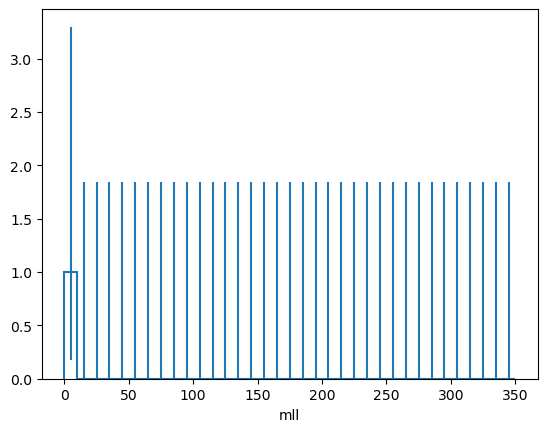

In [5]:
output['dataset1']['mll_hist'].fill(lepFlavor='muon',mll=1)
output['dataset1']['event_count'] += 1
print(output['dataset1'])
output['dataset1']['mll_hist'].plot()

In [6]:
output['dataset2']['mll_hist'].fill(lepFlavor='electron',mll=50)
output['dataset2']['event_count'] += 20
output['dataset3']['mll_hist'].fill(lepFlavor='muon',mll=300)
output['dataset3']['event_count'] += 150

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fad92bed300>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

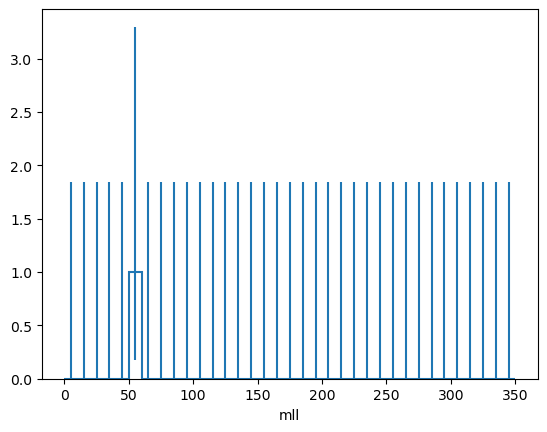

In [7]:
output['dataset2']['mll_hist'].plot()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fad92a992a0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

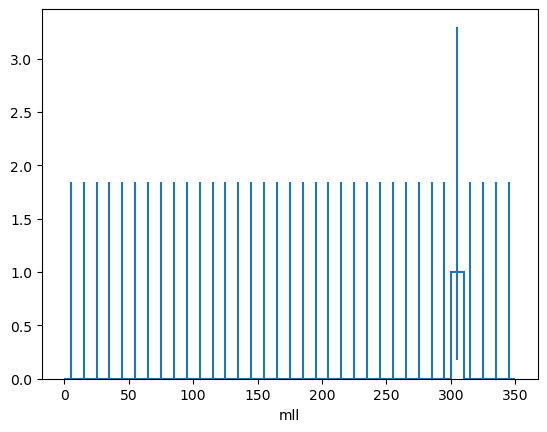

In [8]:
output['dataset3']['mll_hist'].plot()

Note that since we created output by mapping keys to already existing objects `dset1_results`, `dset2_results`, and `dset3_results`, those objects have been changed by the filling process.

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fad92182260>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

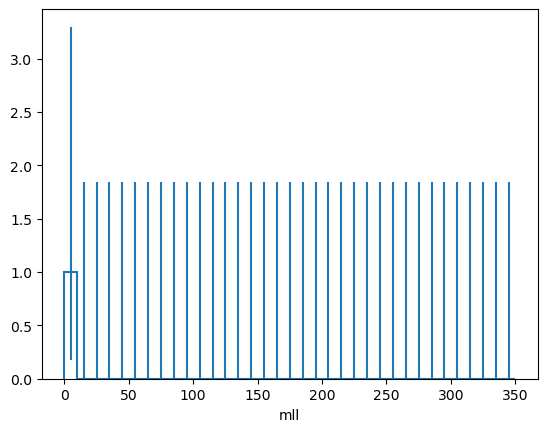

In [10]:
dset1_results['mll_hist'].plot()

However, we can modify `dset1_results` without changing `output['dataset1']`. And, we can now fill `output['dataset1']` without modifying the variable `dset1_results`. This is typical of Python dictionaries, and so is worth keeping in mind when you design/modify your output dictionaries.

In [12]:
dset1 = {'mll_hist': makehist(),'event_count':0}
print(dset1)
print('---------------------')
print(output['dataset1'])
print('---------------------')
output['dataset1']['mll_hist'].fill(lepFlavor='muon',mll=1)
output['dataset1']['event_count'] += 1
print(output['dataset1'])
print('---------------------')
print(dset1)

{'mll_hist': Hist(
  StrCategory([], growth=True, name='lepFlavor'),
  Regular(35, 0, 350, name='mll'),
  storage=Double()), 'event_count': 0}
---------------------
{'mll_hist': Hist(
  StrCategory(['muon'], growth=True, name='lepFlavor'),
  Regular(35, 0, 350, name='mll'),
  storage=Double()) # Sum: 2.0, 'event_count': 2}
---------------------
{'mll_hist': Hist(
  StrCategory(['muon'], growth=True, name='lepFlavor'),
  Regular(35, 0, 350, name='mll'),
  storage=Double()) # Sum: 3.0, 'event_count': 3}
---------------------
{'mll_hist': Hist(
  StrCategory([], growth=True, name='lepFlavor'),
  Regular(35, 0, 350, name='mll'),
  storage=Double()), 'event_count': 0}


Now, let's try to create another dictionary of the same size and structure as `output` and accumulate them together.

In [13]:
dset1 = {'mll_hist': makehist(),'event_count':0}
dset2 = {'mll_hist': makehist(),'event_count':0}
dset3 = {'mll_hist': makehist(),'event_count':0}
output2 = {'dataset1':dset1,'dataset2':dset2,'dataset3':dset3}
print(output2)

{'dataset1': {'mll_hist': Hist(
  StrCategory([], growth=True, name='lepFlavor'),
  Regular(35, 0, 350, name='mll'),
  storage=Double()), 'event_count': 0}, 'dataset2': {'mll_hist': Hist(
  StrCategory([], growth=True, name='lepFlavor'),
  Regular(35, 0, 350, name='mll'),
  storage=Double()), 'event_count': 0}, 'dataset3': {'mll_hist': Hist(
  StrCategory([], growth=True, name='lepFlavor'),
  Regular(35, 0, 350, name='mll'),
  storage=Double()), 'event_count': 0}}


In [14]:
# Fill some ad hoc "results"
output2['dataset1']['mll_hist'].fill(lepFlavor='muon',mll=75)
output2['dataset1']['event_count'] += 100
output2['dataset2']['mll_hist'].fill(lepFlavor='electron',mll=90)
output2['dataset2']['event_count'] += 2
output2['dataset3']['mll_hist'].fill(lepFlavor='electron',mll=145)
output2['dataset3']['event_count'] += 72
print(output2)

{'dataset1': {'mll_hist': Hist(
  StrCategory(['muon'], growth=True, name='lepFlavor'),
  Regular(35, 0, 350, name='mll'),
  storage=Double()) # Sum: 1.0, 'event_count': 100}, 'dataset2': {'mll_hist': Hist(
  StrCategory(['electron'], growth=True, name='lepFlavor'),
  Regular(35, 0, 350, name='mll'),
  storage=Double()) # Sum: 1.0, 'event_count': 2}, 'dataset3': {'mll_hist': Hist(
  StrCategory(['electron'], growth=True, name='lepFlavor'),
  Regular(35, 0, 350, name='mll'),
  storage=Double()) # Sum: 1.0, 'event_count': 72}}


Looking at our new results `output2`, we can see that the results are not the same as what we put in `output` earlier.

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fad920c5d80>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

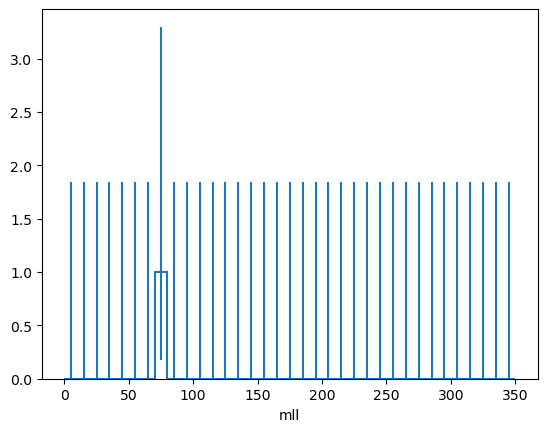

In [15]:
output2['dataset1']['mll_hist'].plot()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fad91f6e200>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

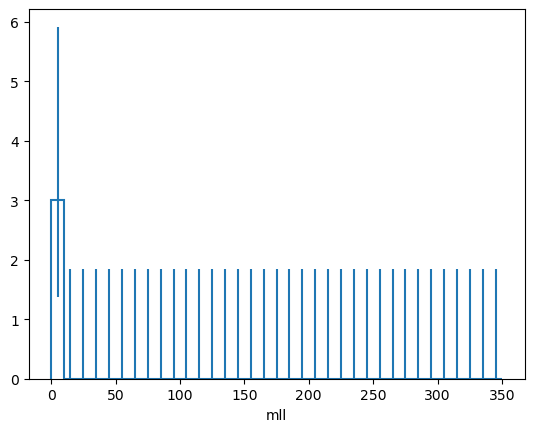

In [16]:
output['dataset1']['mll_hist'].plot()

Now, we can accumulate the results together, using `coffea.processor.accumulate`. This will combine the event count and the histograms by adding the respective entries together.

{'dataset1': {'mll_hist': Hist(
  StrCategory(['muon'], growth=True, name='lepFlavor'),
  Regular(35, 0, 350, name='mll'),
  storage=Double()) # Sum: 4.0, 'event_count': 103}, 'dataset2': {'mll_hist': Hist(
  StrCategory(['electron'], growth=True, name='lepFlavor'),
  Regular(35, 0, 350, name='mll'),
  storage=Double()) # Sum: 2.0, 'event_count': 22}, 'dataset3': {'mll_hist': Hist(
  StrCategory(['muon', 'electron'], growth=True, name='lepFlavor'),
  Regular(35, 0, 350, name='mll'),
  storage=Double()) # Sum: 2.0, 'event_count': 222}}


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fad91ffe1d0>, errorbar=None, legend_artist=None)]

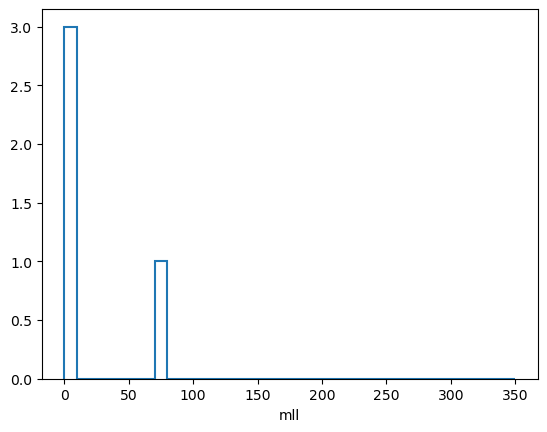

In [17]:
together = accumulate([output,output2])
print(together)
together['dataset1']['mll_hist'].plot()

We also see below that dataset3, which in output was just electron data, while in output2 it was muon data, accumulated them together, while keeping them separable by slicing on the `lepFlavor` axis.

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fad91df15a0>, errorbar=None, legend_artist=None),
 StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fad921492d0>, errorbar=None, legend_artist=None)]

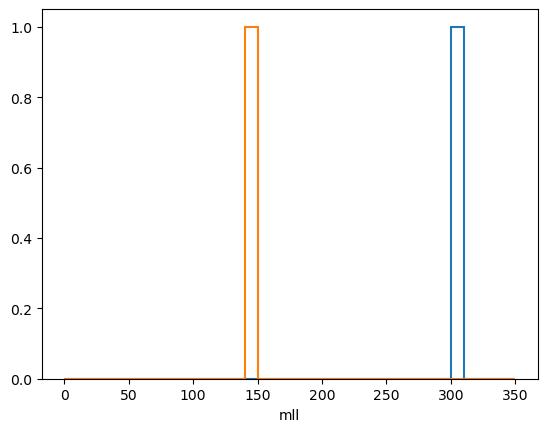

In [22]:
together['dataset3']['mll_hist'].plot()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fad91bc0be0>, errorbar=None, legend_artist=None)]

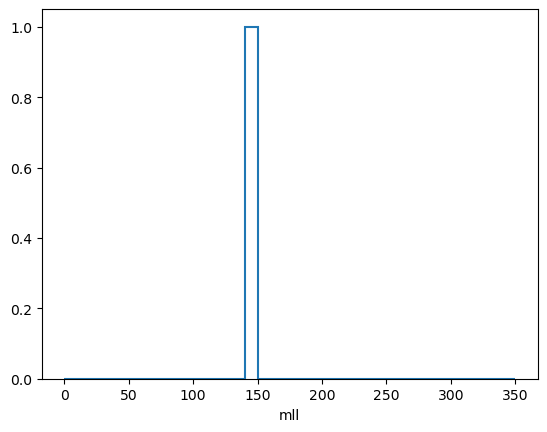

In [23]:
together['dataset3']['mll_hist']['electron',:].plot()

In general, however, the histograms are now added together and not necessarily separable. For example, we filled dataset2's histogram with "electron" results in `output` and `output2`, so slicing along the `lepFlavor` axis makes no difference here.

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fad91c2a470>, errorbar=None, legend_artist=None)]

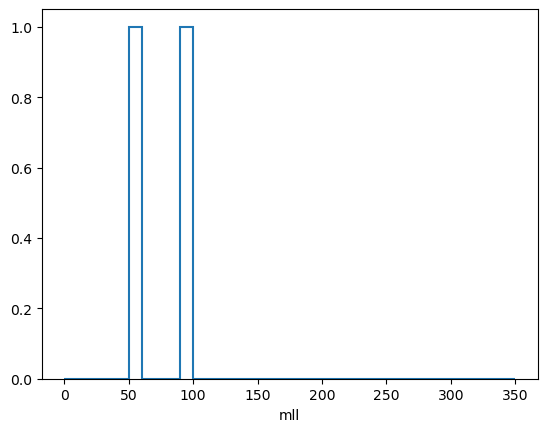

In [24]:
together['dataset2']['mll_hist']['electron',:].plot()

Finally, we want to see what happens if we accumulate two output-sized dictionaries together, but they have different datasets. As a reminder, here is the structure of output, along with one of its plots.

{'dataset1': {'mll_hist': Hist(
  StrCategory(['muon'], growth=True, name='lepFlavor'),
  Regular(35, 0, 350, name='mll'),
  storage=Double()) # Sum: 3.0, 'event_count': 3}, 'dataset2': {'mll_hist': Hist(
  StrCategory(['electron'], growth=True, name='lepFlavor'),
  Regular(35, 0, 350, name='mll'),
  storage=Double()) # Sum: 1.0, 'event_count': 20}, 'dataset3': {'mll_hist': Hist(
  StrCategory(['muon'], growth=True, name='lepFlavor'),
  Regular(35, 0, 350, name='mll'),
  storage=Double()) # Sum: 1.0, 'event_count': 150}}


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fad91ab0640>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

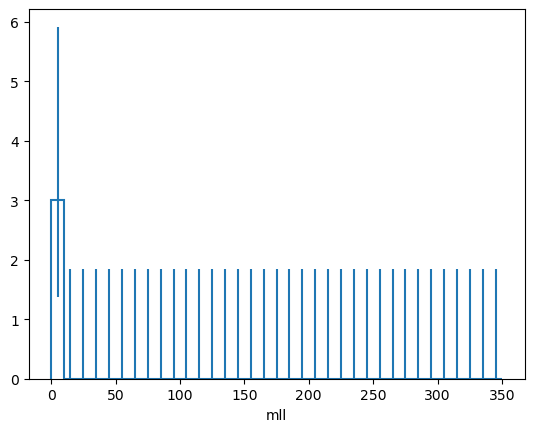

In [25]:
print(output)
output['dataset1']['mll_hist'].plot()

In [27]:
#Create dataset dictionaries
dset1 = {'mll_hist': makehist(),'event_count':0}
dset2 = {'mll_hist': makehist(),'event_count':0}
dset4 = {'mll_hist': makehist(),'event_count':0}
output3 = {'dataset1':dset1,'dataset2':dset2,'dataset4':dset4}

#Fill some arbitrary data
output3['dataset1']['mll_hist'].fill(lepFlavor='electron',mll=62)
output3['dataset1']['event_count'] += 16
output3['dataset2']['mll_hist'].fill(lepFlavor='electron',mll=42)
output3['dataset2']['event_count'] += 354
output3['dataset4']['mll_hist'].fill(lepFlavor='muon',mll=188)
output3['dataset4']['event_count'] += 4

`output3` has dataset1 and dataset2, just like `output`, but has dataset3 instead of dataset4.

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fad9196afe0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

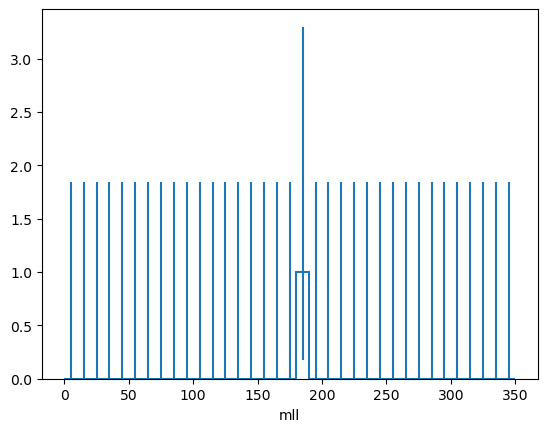

In [28]:
output3['dataset4']['mll_hist'].plot()

When we accumulate together `output` and `output3`, we get all 4 datasets! Sine the dictionaries `output` and `output3` are still compatible, we can combine them as you might expect.

In [29]:
together2 = accumulate([output,output3])
together2

{'dataset1': {'mll_hist': Hist(
    StrCategory(['muon', 'electron'], growth=True, name='lepFlavor'),
    Regular(35, 0, 350, name='mll'),
    storage=Double()) # Sum: 4.0,
  'event_count': 19},
 'dataset2': {'mll_hist': Hist(
    StrCategory(['electron'], growth=True, name='lepFlavor'),
    Regular(35, 0, 350, name='mll'),
    storage=Double()) # Sum: 2.0,
  'event_count': 374},
 'dataset3': {'mll_hist': Hist(
    StrCategory(['muon'], growth=True, name='lepFlavor'),
    Regular(35, 0, 350, name='mll'),
    storage=Double()) # Sum: 1.0,
  'event_count': 150},
 'dataset4': {'mll_hist': Hist(
    StrCategory(['muon'], growth=True, name='lepFlavor'),
    Regular(35, 0, 350, name='mll'),
    storage=Double()) # Sum: 1.0,
  'event_count': 4}}

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fad91a04d00>, errorbar=None, legend_artist=None),
 StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fad91a72a10>, errorbar=None, legend_artist=None)]

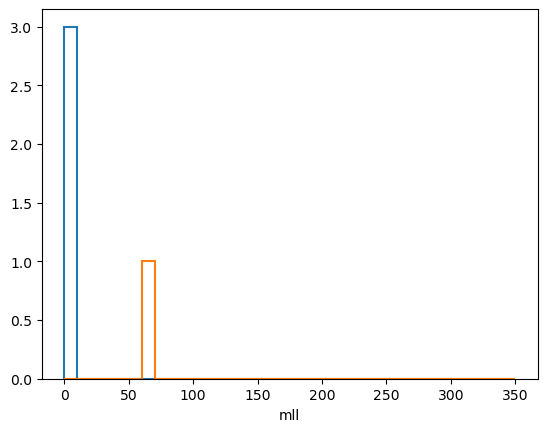

In [30]:
together2['dataset1']['mll_hist'].plot()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fad91874d00>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

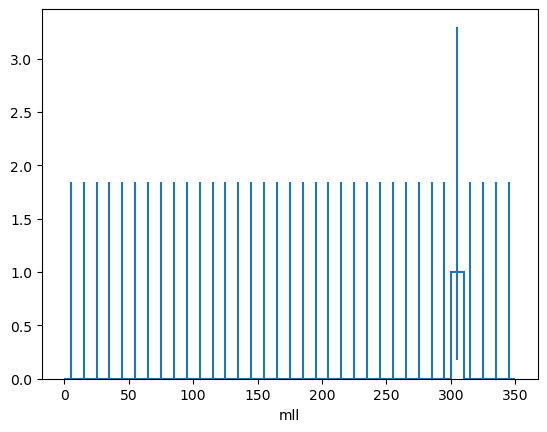

In [31]:
together2['dataset3']['mll_hist'].plot()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fad918f6080>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

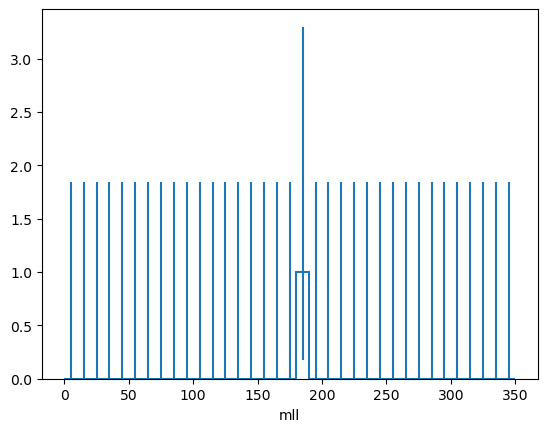

In [32]:
together2['dataset4']['mll_hist'].plot()

So the two dictionaries accumulated together as expected!